In [6]:
#causal-graph-2023-04-12
import csv

# Replace 'your_file.csv' with the actual name of your CSV file
file_name = 'causal-graph-2023-04-12.csv'

# Read the CSV file
with open(file_name, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        source = row['source']
        target = row['target']
        relationship = row['relationship']
        weight = row['weight']

        print(f"{source} {relationship} {target} with weight {weight}")



bathrooms increases bedrooms with weight 1.436
bathrooms increases cable tv with weight 0.183
bathrooms increases cleaning fee with weight 0.868
bathrooms increases gym with weight 0.025
bathrooms increases hot tub with weight 0.159
bathrooms increases indoor fireplace with weight 0.340
bathrooms decreases pets allowed with weight -0.010
bathrooms increases pool with weight 0.183
bathrooms increases price with weight 0.703
bathrooms increases washer with weight 0.351
bathrooms increases dryer with weight 0.347
bathrooms increases accommodates with weight 1.139
beds increases cable tv with weight 0.041
beds increases cleaning fee with weight 0.355
beds increases extra people with weight 0.030
beds increases kitchen with weight 0.021
beds increases pets allowed with weight 0.091
beds increases accommodates with weight 1.055
bedrooms increases beds with weight 1.555
bedrooms increases cable tv with weight 0.025
bedrooms increases cleaning fee with weight 0.589
bedrooms increases kitchen w

In [2]:
!pip install networkx matplotlib



: 

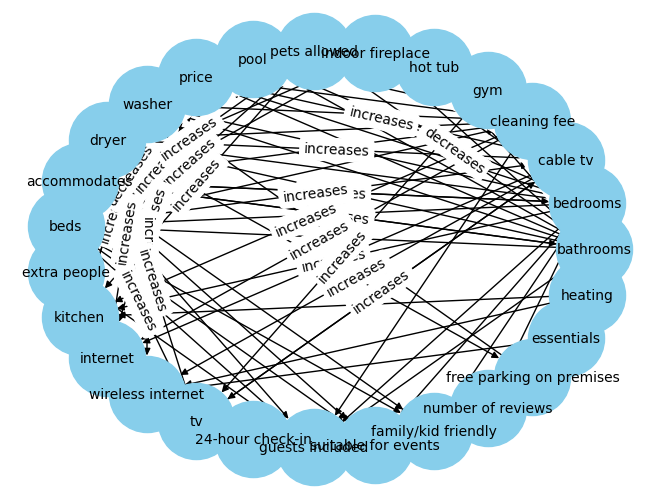

In [3]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

file_name = 'causal-graph-2023-04-12.csv'

# Create a new graph
G = nx.DiGraph()

# Read the CSV file
with open(file_name, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        source = row['source']
        target = row['target']
        relationship = row['relationship']
        
        # Check if the weight value is empty
        if row['weight'] == '':
            weight = 1.0  # Use a default value if weight is empty
        else:
            weight = float(row['weight'])

        # Add the nodes and edges to the graph
        G.add_edge(source, target, weight=weight, label=relationship)

# Draw the graph with a circular layout
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10)

# Draw edge labels with relationship information
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Show the graph
plt.axis('off')
plt.show()


In [4]:
!pip install plotly

In [7]:
import csv
import networkx as nx
import plotly.graph_objects as go

file_name = 'causal-graph-2023-04-12.csv'

# Create a new graph
G = nx.DiGraph()

# Read the CSV file
with open(file_name, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        source = row['source']
        target = row['target']
        relationship = row['relationship']

        if row['weight'] == '':
            weight = 1.0
        else:
            weight = float(row['weight'])

        G.add_edge(source, target, weight=weight, label=relationship)

# Set node positions using the spring layout
pos = nx.spring_layout(G)

# Prepare data for the Plotly plot
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=1, color='#888'), hoverinfo='none', mode='lines')

node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

node_trace = go.Scatter(x=node_x, y=node_y, text=list(G.nodes), mode='markers+text', hoverinfo='text',
                        marker=dict(symbol='circle', size=30, color='skyblue'),
                        textposition='bottom center', textfont=dict(size=12))

# Create the Plotly plot
fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(showlegend=False, hovermode='closest'))
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y'), plot_bgcolor='white')
fig.show()


In [8]:
!pip install pyvis

     -------------------------------------- 756.0/756.0 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 40.5/40.5 kB ? eta 0:00:00


In [9]:
import csv
import networkx as nx
from pyvis.network import Network

file_name = 'causal-graph-2023-04-12.csv'

# Create a new graph
G = nx.DiGraph()

# Read the CSV file
with open(file_name, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        source = row['source']
        target = row['target']
        relationship = row['relationship']

        if row['weight'] == '':
            weight = 1.0
        else:
            weight = float(row['weight'])

        G.add_edge(source, target, weight=weight, label=relationship)

# Create a pyvis network
net = Network(notebook=True)
net.from_nx(G)

# Customize node and edge appearance
net.toggle_physics(False)
for node in net.nodes:
    node['color'] = 'skyblue'
    node['size'] = 30
    node['font'] = {'color': 'black', 'size': 12}

for edge in net.edges:
    edge['color'] = '#888'
    edge['width'] = 1.0
    edge['label'] = G.edges[edge['from'], edge['to']]['label']

# Show the interactive network visualization
net.show('causal_graph.html')


causal_graph.html


In [10]:
import csv

# Replace 'your_file.csv' with the actual name of your CSV file
file_name = 'causal-graph-2023-04-12.csv'

# Specify the output file name
output_file_name = 'output.txt'

# Read the CSV file
with open(file_name, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    # Open the output file for writing
    with open(output_file_name, 'w', encoding='utf-8') as output_file:
        for row in reader:
            source = row['source']
            target = row['target']
            relationship = row['relationship']
            weight = row['weight']

            # Write the formatted string to the output file
            output_file.write(f"{source} {relationship} {target} with weight {weight}\n")
